Wisconsin (Original) dataset
Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [25]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [56]:
#Read data

tumor_df = pd.read_csv('tumor.csv')

In [57]:
tumor_df.head(10)  

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [58]:
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell_Size                      699 non-null int64
Cell_Shape                     699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Normal_Nucleoli                699 non-null int64
Bland_Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [59]:
tumor_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal_Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland_Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [60]:
tumor_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

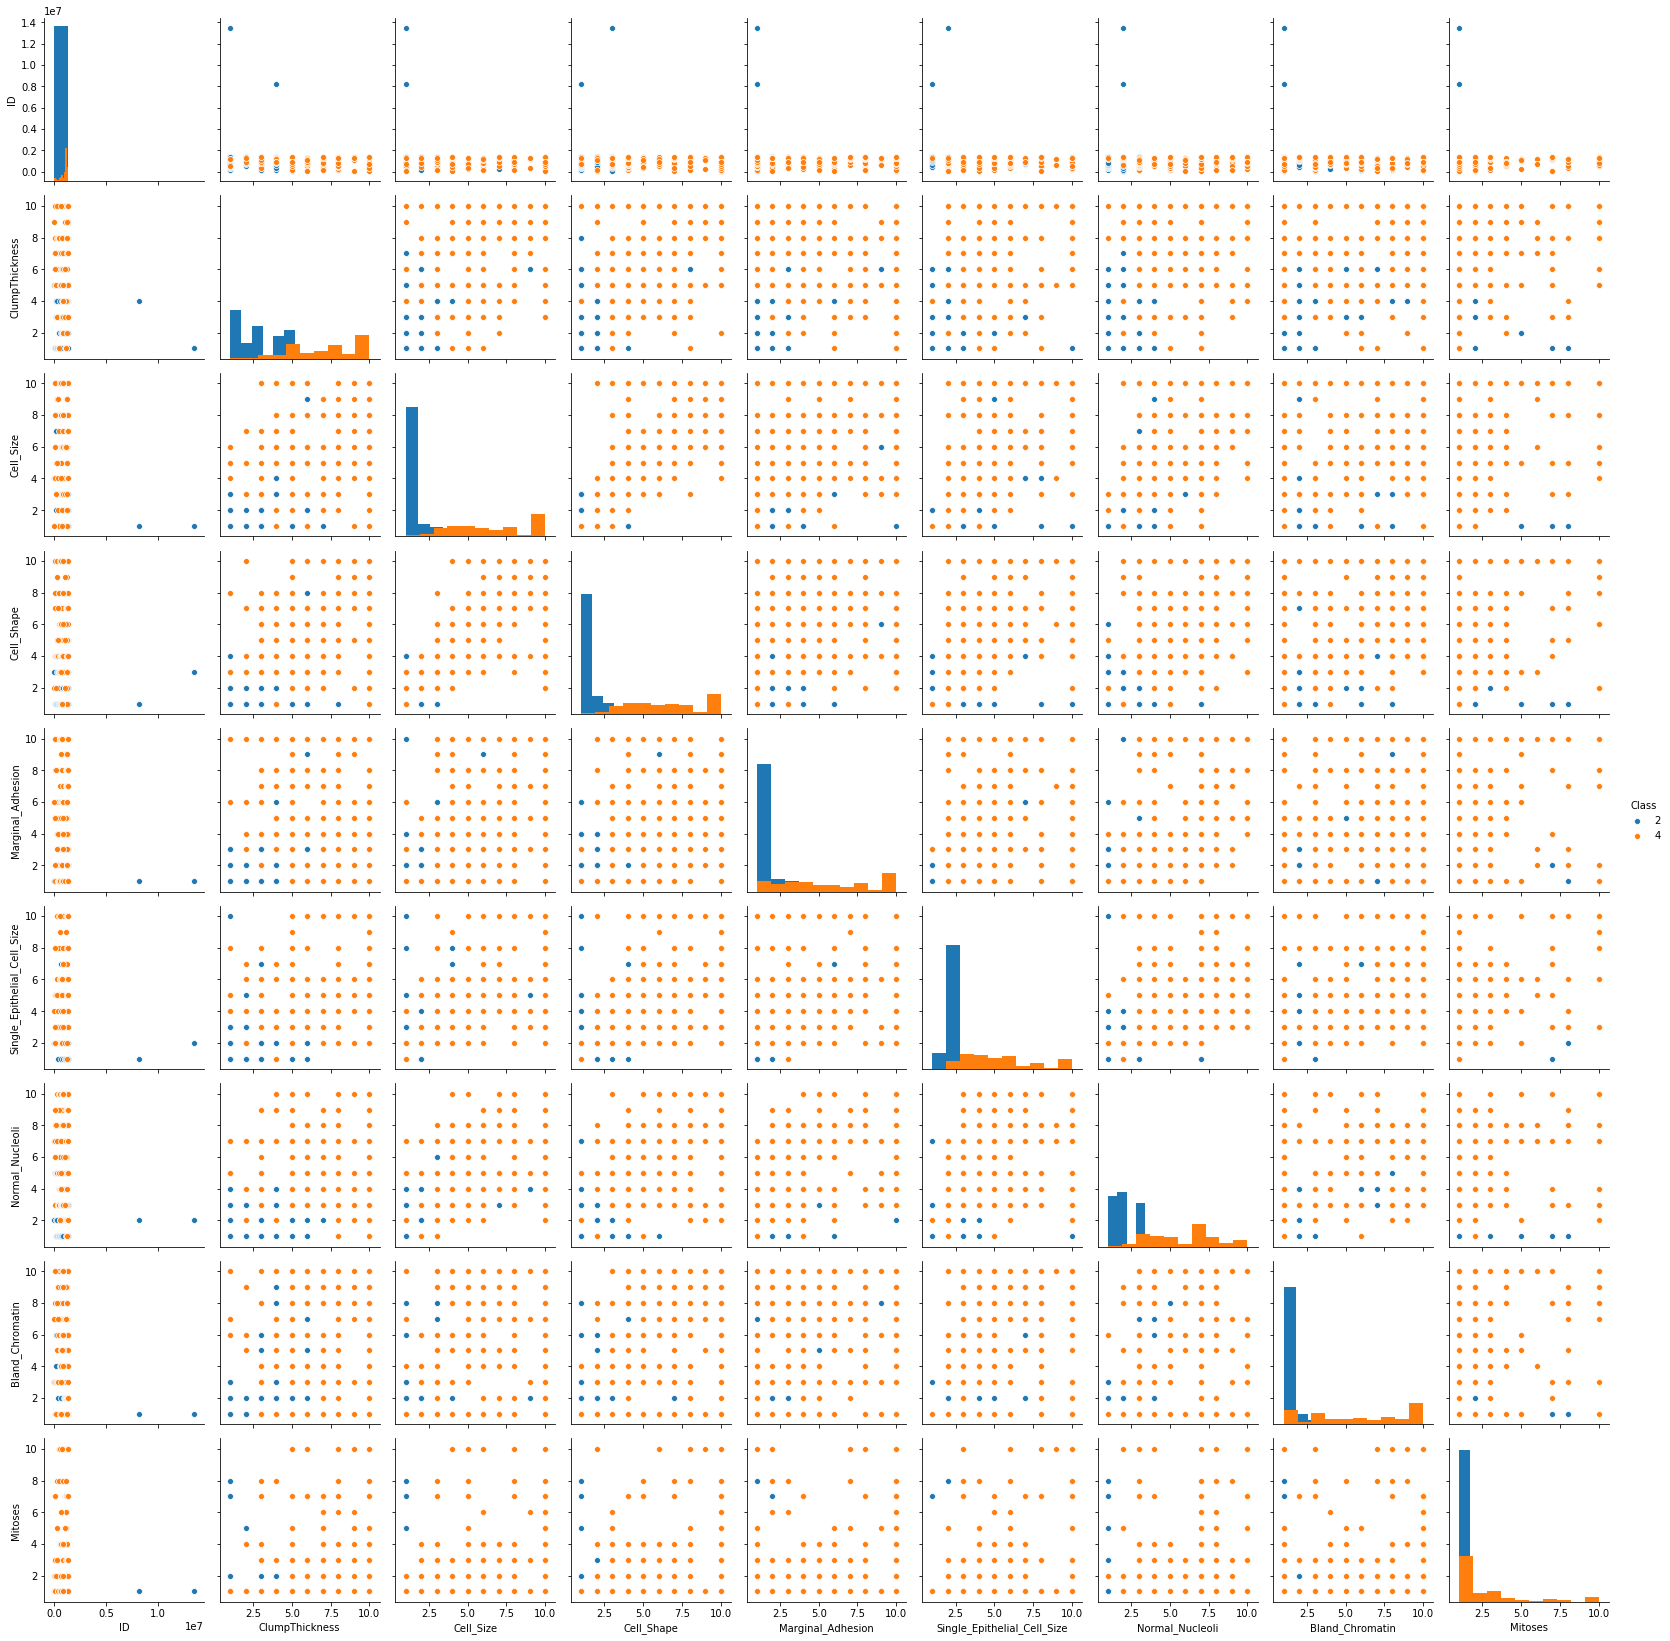

In [61]:

sns.pairplot(tumor_df , diag_kind = "hist", hue="Class")

In [ ]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  tumor_df.drop("Class", axis=1)
y =  tumor_df.pop("Class")

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(model.score(X_train , y_train))  
print(model.score(X_test , y_test))  
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

# MultinimialNB

In [ ]:
# Invoking the MultinomialNB  function to create the model
# fitting the model in the training data set
model = MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(model.score(X_train , y_train))  
print(model.score(X_test , y_test))  
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))